## diffusion
diffusion models work by destroying the inputs by adding noise, and then recovering the inputs by denoising(parametrized backward process). Markov chain

task: prediction noise added into the images


In [5]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
def imggen(img):
    img_path=mpimg.imread(img)
    plt.imshow(img_path)
    plt.axis("off")
    plt.show()

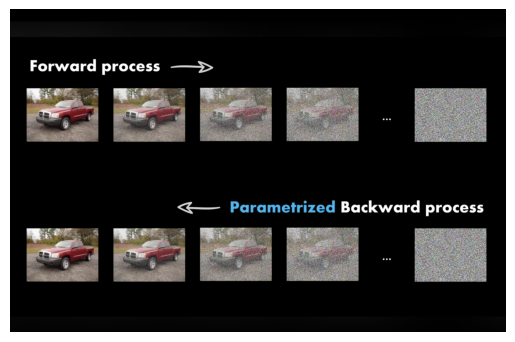

In [6]:
imggen('whatsdiffusion.png')

We would need a noise scheduler, a neural network and a timestep encoder

In [8]:
import torch
import torchvision

def show_images(dataset, num_samples=20, cols=4):
    plt.figure(figsize=(15,15))
    for i, img in enumerate(data):
        if i==num_samples:
            break
        plt.subplot(num_samples/cols+1,cols,i+1)
        plt.imshow(img[0])

# data= torchvision.datasets.StanfordCars(root=".", download=True)  #wont work, dataset not available anymore

In [10]:
import kagglehub

path = kagglehub.dataset_download("eduardo4jesus/stanford-cars-dataset")

print("Path to dataset files:", path)

/Users/abhimanyu/Desktop/geospacy/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 1.82G/1.82G [03:20<00:00, 9.76MB/s]

Extracting files...


Path to dataset files: /Users/abhimanyu/.cache/kagglehub/datasets/eduardo4jesus/stanford-cars-dataset/versions/1


In [ ]:

# Unzip / locate images and prepare dataset path
import os
import zipfile
from pathlib import Path

# If `path` variable exists from the kagglehub cell, use it; otherwise set a fallback path
dataset_root = globals().get('path', None)
if dataset_root is None:
    dataset_root = "/path/to/stanford-cars-dataset.zip"  # <- replace if needed

# If dataset_root is a zip file, extract it next to the zip
if os.path.isfile(dataset_root) and str(dataset_root).lower().endswith('.zip'):
    extract_dir = os.path.join(os.path.dirname(dataset_root), 'stanford_cars')
    if not os.path.exists(extract_dir):
        print('Extracting zip to', extract_dir)
        with zipfile.ZipFile(dataset_root, 'r') as z:
            z.extractall(extract_dir)
    dataset_dir = extract_dir
else:
    dataset_dir = dataset_root

# Try to find a subfolder that contains images
candidates = []
possible_names = ['cars_train', 'train', 'Car_ims', 'images', 'car_images', 'cars']
for name in possible_names:
    cand = os.path.join(dataset_dir, name) if dataset_dir else None
    if cand and os.path.isdir(cand):
        candidates.append(cand)

if not candidates and dataset_dir and os.path.isdir(dataset_dir):
    # walk and find first folder with image files
    for root, dirs, files in os.walk(dataset_dir):
        for f in files:
            if f.lower().endswith(('.jpg', '.jpeg', '.png')):
                candidates.append(root)
                break
        if candidates:
            break

if not candidates:
    raise RuntimeError(f"Could not find image files under {dataset_dir!r}. Check the extracted contents: {os.listdir(os.path.dirname(dataset_dir) if dataset_dir else '.')}")

images_path = candidates[0]
print('Using images folder:', images_path)
</VSCode.Cell>
<VSCode.Cell language="python">
# Create ImageFolder dataset and DataLoader, then display a few samples
import torch
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt

# Basic transforms suitable for models / visualization
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(images_path, transform=transform)
print(len(dataset), 'images in', len(dataset.classes), 'classes')

# DataLoader - set num_workers=0 on macOS for simple runs; change if desired
from torch.utils.data import DataLoader
dl = DataLoader(dataset, batch_size=16, shuffle=True, num_workers=0)

# visualize a batch (unnormalize for display)
def imshow_batch(batch_tensor):
    imgs = batch_tensor.clone()
    # un-normalize
    mean = torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
    std = torch.tensor([0.229, 0.224, 0.225]).view(3,1,1)
    imgs = imgs * std + mean
    grid = utils.make_grid(imgs, nrow=4)
    plt.figure(figsize=(6,6))
    plt.imshow(grid.permute(1,2,0).cpu())
    plt.axis('off')

batch = next(iter(dl))
images, labels = batch
imshow_batch(images[:16])
